In [90]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [91]:
df = pd.read_csv('./B072BCNRTY.csv')
df.head()

,Title,Rating,Date,Content
0,This stand is perfect for Green Screens!,5.0,2021/08/27,I used this at my wedding and it was so perfec...
1,Great backdrop stand,5.0,2021/08/26,NaN
2,Easy to assemble best not to fully extend,5.0,2021/08/25,Seems pretty well made. When open to 9-10' it ...
3,Great investment piece!,4.0,2021/08/23,Took a gamble on this mid-priced backdrop stan...
4,Missing items,5.0,2021/08/23,Everything else looks good but I am missing 2 ...


In [5]:
# 영어 문자만 남기고, 대문자는 소문자로 변환
df['Content1'] = df['Content'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)).lower())
df.head()

,Title,Rating,Date,Content,Content1
0,This stand is perfect for Green Screens!,5.0,2021/08/27,I used this at my wedding and it was so perfec...,i used this at my wedding and it was so perfec...
1,Great backdrop stand,5.0,2021/08/26,NaN,nan
2,Easy to assemble best not to fully extend,5.0,2021/08/25,Seems pretty well made. When open to 9-10' it ...,seems pretty well made when open to it ...
3,Great investment piece!,4.0,2021/08/23,Took a gamble on this mid-priced backdrop stan...,took a gamble on this mid priced backdrop stan...
4,Missing items,5.0,2021/08/23,Everything else looks good but I am missing 2 ...,everything else looks good but i am missing ...


In [6]:
# Content1에서 결측치 제거
df = df.dropna()
df.head()

,Title,Rating,Date,Content,Content1
0,This stand is perfect for Green Screens!,5.0,2021/08/27,I used this at my wedding and it was so perfec...,i used this at my wedding and it was so perfec...
2,Easy to assemble best not to fully extend,5.0,2021/08/25,Seems pretty well made. When open to 9-10' it ...,seems pretty well made when open to it ...
3,Great investment piece!,4.0,2021/08/23,Took a gamble on this mid-priced backdrop stan...,took a gamble on this mid priced backdrop stan...
4,Missing items,5.0,2021/08/23,Everything else looks good but I am missing 2 ...,everything else looks good but i am missing ...
5,Love it so much! Easy to set up! Definitely n...,4.0,2021/08/22,Easy to set up. Love the tote bag for easy cle...,easy to set up love the tote bag for easy cle...


In [7]:
df.shape

(3051, 5)

#### Good Review 필터링

In [10]:
good = df[df['Rating']>3]
good.sample(10)

,Title,Rating,Date,Content,Content1
1755,Great product,5.0,2019/01/17,Great product. Easy to assemble and very fast ...,great product easy to assemble and very fast ...
2170,Great Portable Product,5.0,2018/08/20,Great portable product! Easy set up! Should ha...,great portable product easy set up should ha...
2239,Great product,5.0,2018/07/23,Exactly what I needed. Although it fell a few ...,exactly what i needed although it fell a few ...
2196,Good purchase for price,5.0,2018/08/9,Nice and easy little set up. The top bar comes...,nice and easy little set up the top bar comes...
2177,Check the packaging and make sure all pieces a...,5.0,2018/08/18,I bought the product over a month ago and open...,i bought the product over a month ago and open...
1334,Great Product!,5.0,2019/05/21,"Easy Setup! Portable, seems very high quality ...",easy setup portable seems very high quality ...
772,Great!!!!,5.0,2019/11/14,Great for the price. Product worked as expecte...,great for the price product worked as expecte...
2784,Great value,5.0,2018/02/11,Very good quality for the money,very good quality for the money
1388,Lot's of great uses for these stands.,5.0,2019/05/5,I bought four of these. I use them to hang fa...,i bought four of these i use them to hang fa...
2847,Love how you can adjust height and length,5.0,2018/01/19,Love how you can adjust height and length. Als...,love how you can adjust height and length als...


In [11]:
good.shape

(2356, 5)

## Good Review 텍스트 분석
### 의미가 없는 불용어 제거

In [64]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jai19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jai19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
stop_words = set(stopwords.words('english')) 

all_words = ""
for content in good['Content1']:
    all_words += content + " "

word_tokens = word_tokenize(all_words)

result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens, '\n')

['i', 'used', 'this', 'at', 'my', 'wedding', 'and', 'it', 'was', 'so', 'perfect', 'i', 'highly', 'recommend', 'it', 'seems', 'pretty', 'well', 'made', 'when', 'open', 'to', 'it', 'says', 'a', 'little', 'if', 'the', 'back', 'drop', 'is', 'not', 'very', 'light', 'took', 'a', 'gamble', 'on', 'this', 'mid', 'priced', 'backdrop', 'stand', 'so', 'glad', 'i', 'did', 'already', 'used', 'it', 'more', 'that', 'x', 'and', 'will', 'continue', 'to', 'use', 'it', 'in', 'the', 'fall', 'holidays', 'everything', 'else', 'looks', 'good', 'but', 'i', 'am', 'missing', 'sandbags', 'my', 'backdrop', 'stand', 'is', 'not', 'sturdy', 'without', 'the', 'weight', 'please', 'send', 'them', 'asap', 'for', 'my', 'missing', 'items', 'easy', 'to', 'set', 'up', 'love', 'the', 'tote', 'bag', 'for', 'easy', 'clean', 'up', 'too', 'just', 'in', 'love', 'with', 'it', 'made', 'are', 'party', 'so', 'much', 'awsome', 'this', 'product', 'is', 'very', 'flimsy', 'ordered', 'this', 'for', 'a', 'birthday', 'party', 'backdrop', 'pi

In [66]:
print(result)

['used', 'wedding', 'perfect', 'highly', 'recommend', 'seems', 'pretty', 'well', 'made', 'open', 'says', 'little', 'back', 'drop', 'light', 'took', 'gamble', 'mid', 'priced', 'backdrop', 'stand', 'glad', 'already', 'used', 'x', 'continue', 'use', 'fall', 'holidays', 'everything', 'else', 'looks', 'good', 'missing', 'sandbags', 'backdrop', 'stand', 'sturdy', 'without', 'weight', 'please', 'send', 'asap', 'missing', 'items', 'easy', 'set', 'love', 'tote', 'bag', 'easy', 'clean', 'love', 'made', 'party', 'much', 'awsome', 'product', 'flimsy', 'ordered', 'birthday', 'party', 'backdrop', 'pieces', 'missing', 'short', 'use', 'ruined', 'whole', 'damn', 'evening', 'like', 'easy', 'assemble', 'worked', 'well', 'banner', 'used', 'business', 'backdrop', 'granddaughters', 'baby', 'shower', 'item', 'come', 'items', 'listed', 'buy', 'would', 'recommend', 'awesome', 'product', 'sturd', 'loved', 'product', 'good', 'extending', 'bars', 'top', 'piece', 'arrived', 'slightly', 'bent', 'get', 'slide', 'att

In [136]:
# result 총 단어 수 카운트
counts_result = Counter(result)

# counts_result
a = pd.DataFrame.from_dict(counts_result, orient='index').reset_index()
a

,index,0
0,used,225
1,wedding,51
2,perfect,202
3,highly,31
4,recommend,134
...,...,...
3326,awkward,1
3327,threads,1
3328,clamped,1
3329,hi,1


In [140]:
aa = a.rename(columns={"index":"words", 0:"counts"}).sort_values(by=['counts'], ascending=False)
aa

,words,counts
41,easy,848
170,great,624
50,product,429
25,use,405
19,backdrop,398
...,...,...
1938,seperately,1
1937,apartment,1
1936,sweetheart,1
1935,ceremony,1


In [142]:
aa.to_csv('good_review.csv', index=False)

### 텍스트 분석 시각화

In [67]:
!pip install wordcloud
!pip install matplotlib

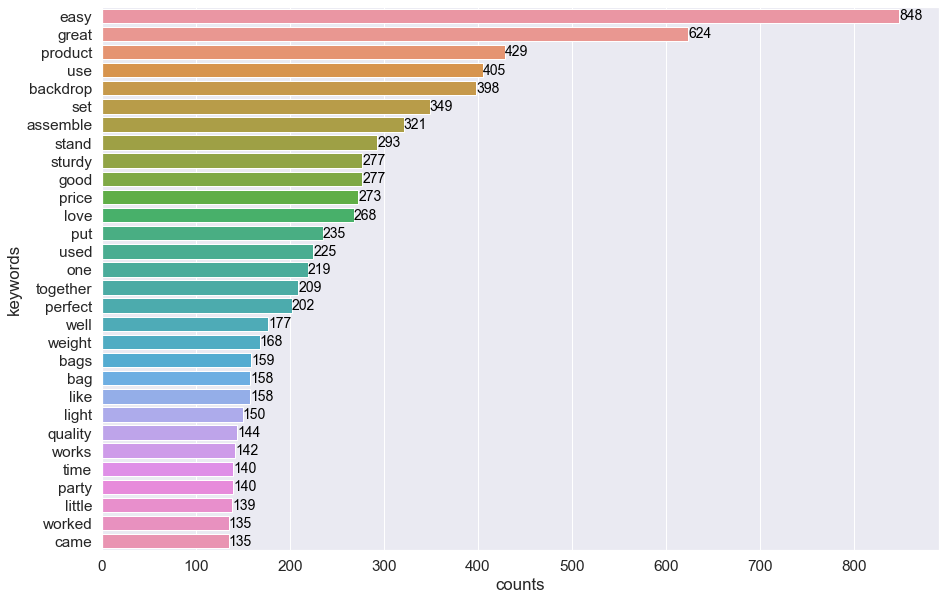

In [113]:
import sys
import seaborn as sns
from collections import Counter

sns.set(font_scale=1.4)

counts_selected = Counter(result)
counts_selected.most_common(31)
counts_good = pd.DataFrame(counts_selected.most_common(31))
counts_good.columns = ['keywords', 'counts']

counts_good = counts_good.drop([12]) # would 제거



plt.figure(figsize=(15,10))

counts_good = counts_good.groupby('keywords').sum().sort_values(by='counts', ascending=False).reset_index()

g = sns.barplot(x='counts', y='keywords', data=counts_good)



for index, row in counts_good.iterrows():
    g.text(row.counts, row.name, round(row.counts,2), fontsize=14, color='black', ha="left", verticalalignment='center')

In [108]:
counts_dff = pd.DataFrame(data = counts_selected, index=['words'])
counts_dff

counts_dff.sum()

used         225
wedding       51
perfect      202
highly        31
recommend    134
            ... 
awkward        1
threads        1
clamped        1
hi             1
skinner        1
Length: 3331, dtype: int64

In [59]:
gg = pd.DataFrame(counts_good)
gg.head()

,keywords,counts
0,easy,848
1,great,624
2,product,429
3,use,405
4,backdrop,398


### 워드 클라우드

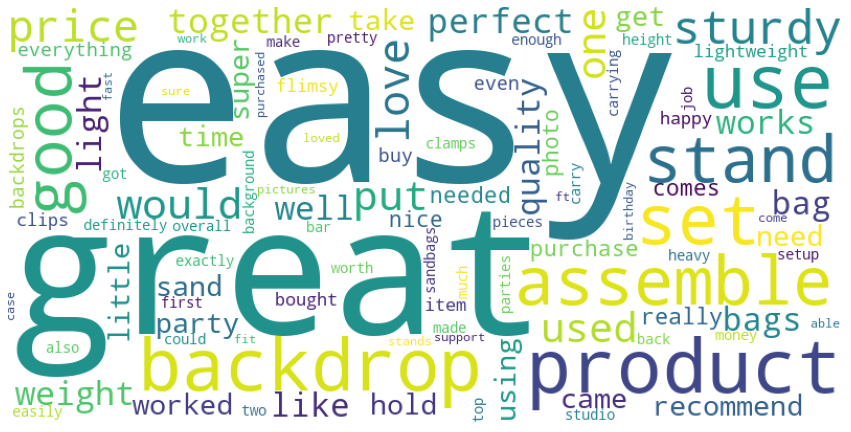

In [60]:
from wordcloud import WordCloud
import platform

wordcloud = WordCloud(background_color='white',
                     max_words=100,
                     relative_scaling=0.3,
                     width=800,
                     height=400).generate_from_frequencies(counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('good_review.png')